#PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Dataset/Diarrhea
%ls

/content/drive/MyDrive/Dataset/Diarrhea
 Diare.csv      dummy2.csv   golf_df.csv               MuaraBeliti.csv
 Diarrhea.csv   dummy.csv   'Laporan Diare 2019.xls'   tree.dot


In [ ]:
import csv
import pandas as pd

data= pd.read_csv('Diare.csv')
data= data.dropna() #drop all missing data
data.describe()

In [ ]:
#Rename Column
data = data.rename(columns={'Nyeri di Perut':'Nyeri',
                                    'Mulut Kering':'MK',
                                    'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})
data

Text(0, 0.5, 'Frekuensi')

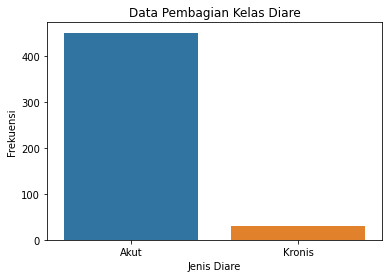

In [ ]:
#Check Pembagian tiap target class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.countplot(x = data['Diare'])
plt.title('Data Pembagian Kelas Diare')
plt.xlabel('Jenis Diare')
plt.ylabel('Frekuensi')

# Proceed Normal Learning Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#Encode using LabelEncoder
le = LabelEncoder()
data= data.apply(le.fit_transform)

#Split data train and test
X = data.drop(columns='Diare')
y = data['Diare']

X_train, X_test, y_train, y_test = tt(X,y, test_size = 0.3, random_state=16)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00        12

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



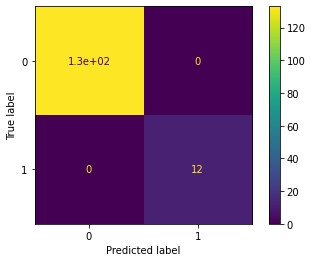

In [ ]:
#learning model using imbalanced dataset
model1 = DecisionTreeClassifier(criterion='gini') #using default position
model1.fit(X_train, y_train)

#Test data report
y_pred = model1.predict(X_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

In [ ]:
#Searching every randomstate hoping there's one or two values that not 100% accurate
import numpy as np

def search():
  clf = DecisionTreeClassifier(criterion='gini')
  with open('search.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['RandomState', 'Accuracy Training'])
    for rs in range(100):
      X_train, X_test, y_train, y_test = tt(X,y, test_size = 0.3, random_state= rs+1)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      acc = (np.sum(y_pred == y_test)/y_test.size)*100
      writer.writerow([str(rs+1), str(acc)])

search()
hasil = pd.read_csv('search.csv')
hasil.describe()

,RandomState,Accuracy Training
count,100.000000,100.0
mean,50.500000,100.0
std,29.011492,0.0
min,1.000000,100.0
25%,25.750000,100.0
50%,50.500000,100.0
75%,75.250000,100.0
max,100.000000,100.0


# Proceed Undersampling for balanced data sample

In [50]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from collections import Counter

rus = RandomUnderSampler(random_state=8)
X_sam, y_sam = rus.fit_sample(X,y)
print(Counter(y_sam))

Counter({0: 31, 1: 31})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



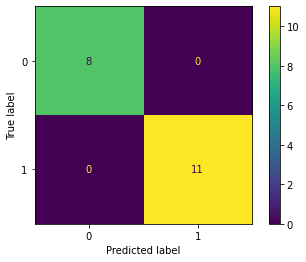

In [53]:
#splitting data sample
X_train, X_test, y_train, y_test = tt(X_sam, y_sam, test_size=0.3, random_state=8)

#Create Classifier
model2 = DecisionTreeClassifier(criterion='gini')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

In [55]:
#searching throung 100 randomstate as same as normal run before

def search2():
  clf = DecisionTreeClassifier(criterion='gini')
  with open('search2.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['RandomState', 'Accuracy Training'])
    for rs in range(100):
      X_train, X_test, y_train, y_test = tt(X_sam,y_sam, test_size = 0.3, random_state= rs+1)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      acc = (np.sum(y_pred == y_test)/y_test.size)*100
      writer.writerow([str(rs+1), str(acc)])

search2()
hasil2 = pd.read_csv('search2.csv')
hasil2.describe()

,RandomState,Accuracy Training
count,100.000000,100.000000
mean,50.500000,99.473684
std,29.011492,1.586902
min,1.000000,94.736842
25%,25.750000,100.000000
50%,50.500000,100.000000
75%,75.250000,100.000000
max,100.000000,100.000000


# Proceed Oversampling (SMOTE) for balanced data sample

In [56]:
from imblearn.over_sampling import SMOTE

over = SMOTE()
X_samp, y_samp = over.fit_sample(X,y)
print(Counter(y_samp))

Counter({0: 451, 1: 451})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       149

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



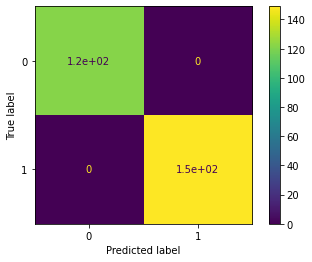

In [57]:
#splitting data sample
X_train, X_test, y_train, y_test = tt(X_samp, y_samp, test_size=0.3, random_state=8)

#Create Classifier
model3 = DecisionTreeClassifier(criterion='gini')
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model3, X_test, y_test)
plt.show()

In [58]:
#searching throung 100 randomstate as same as normal run before

def search3():
  clf = DecisionTreeClassifier(criterion='gini')
  with open('search3.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['RandomState', 'Accuracy Training'])
    for rs in range(100):
      X_train, X_test, y_train, y_test = tt(X_samp,y_samp, test_size = 0.3, random_state= rs+1)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      acc = (np.sum(y_pred == y_test)/y_test.size)*100
      writer.writerow([str(rs+1), str(acc)])

search2()
hasil2 = pd.read_csv('search2.csv')
hasil2.describe()

,RandomState,Accuracy Training
count,100.000000,100.000000
mean,50.500000,99.263158
std,29.011492,1.835448
min,1.000000,94.736842
25%,25.750000,100.000000
50%,50.500000,100.000000
75%,75.250000,100.000000
max,100.000000,100.000000


# Visualization Tree

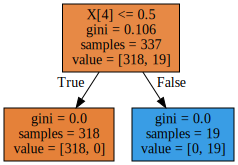

In [61]:
from sklearn import tree
from sklearn.tree import export_graphviz
tree.export_graphviz(model1, out_file='tree.dot')
from graphviz import Source
from IPython.display import display, SVG

graph = Source(tree.export_graphviz(model1, filled = True))
display(SVG(graph.pipe(format='svg')))

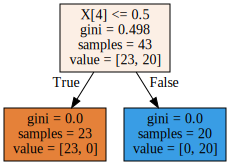

In [62]:
tree.export_graphviz(model2, out_file='tree.dot')
graph = Source(tree.export_graphviz(model2, filled = True))
display(SVG(graph.pipe(format='svg')))

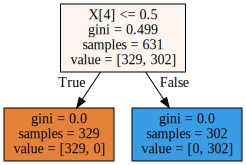

In [63]:
tree.export_graphviz(model3, out_file='tree.dot')
graph = Source(tree.export_graphviz(model3, filled = True))
display(SVG(graph.pipe(format='svg')))